<a href="https://colab.research.google.com/github/Alimusy/musty/blob/main/Product%20Sales%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Load your Excel file
df = pd.read_excel("retail_sales_2024_2025.xlsx")

# Quick look
print(df.head())

   Year    Month           Product  Units Sold  Revenue (₦)
0  2024  January     PS5 Brand New          55      4400000
1  2024  January  PS5 Premium-Used          65      3250000
2  2024  January  PS4 Premium-Used          40      1200000
3  2024  January       Controllers          55       660000
4  2024  January       Accessories          65       520000


In [ ]:
# Total revenue and units
Total_revenue = df["Revenue (₦)"].sum()
Total_units = df["Units Sold"].sum()
print("Total Revenue (₦):", Total_revenue)

# By Revenue
revenue_per_year = df.groupby("Year")["Revenue (₦)"].sum()
revenue_per_product = df.groupby("Product")["Revenue (₦)"].sum()

print("Revenue per Year:\n", revenue_per_year)
print("Revenue per Month:\n", revenue_per_product)

# By units

Total Revenue (₦): 198522000
Revenue per Year:
 Year
2024    120002000
2025     78520000
Name: Revenue (₦), dtype: int64
Revenue per Month:
 Product
Accessories         10128000
Controllers         13104000
PS4 Premium-Used    23280000
PS5 Brand New       88560000
PS5 Premium-Used    63450000
Name: Revenue (₦), dtype: int64


In [ ]:
# Revenue share (%) by product
product_share = (revenue_per_product / Total_revenue) * 100
print(product_share)



Product
Accessories          5.101702
Controllers          6.600780
PS4 Premium-Used    11.726660
PS5 Brand New       44.609665
PS5 Premium-Used    31.961193
Name: Revenue (₦), dtype: float64


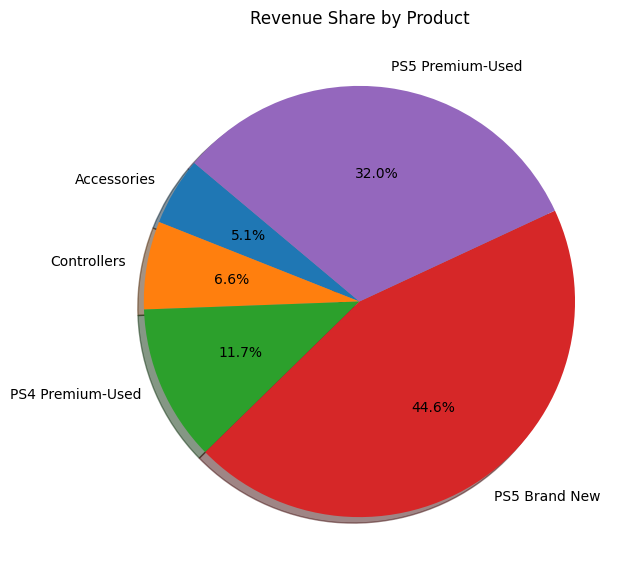

In [ ]:
import matplotlib.pyplot as plt

product_share = df.groupby("Product")["Revenue (₦)"].sum()

plt.figure(figsize=(7,7))
product_share.plot(kind="pie", autopct="%1.1f%%", startangle=140, shadow=True)
plt.title("Revenue Share by Product")
plt.ylabel("")
plt.show()



<Figure size 1000x600 with 0 Axes>

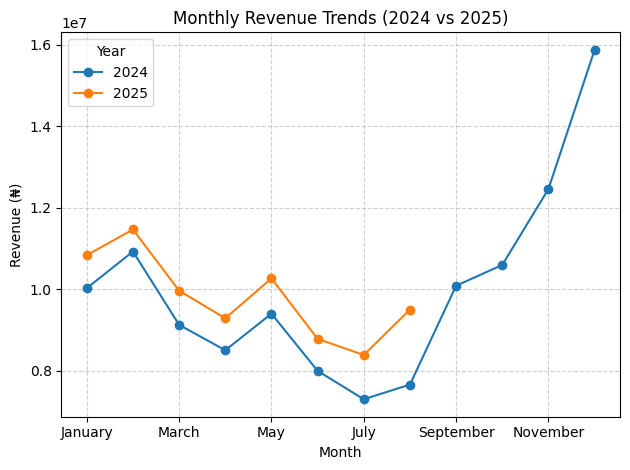

In [ ]:
import matplotlib.pyplot as plt

# Pivot data: months as index, years as columns
monthly_revenue = df.pivot_table(index="Month", columns="Year", values="Revenue (₦)", aggfunc="sum")

# Ensure months are in the right order
months_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
monthly_revenue = monthly_revenue.reindex(months_order)

# Plot
plt.figure(figsize=(10,6))
monthly_revenue.plot(kind="line", marker="o")

plt.title("Monthly Revenue Trends (2024 vs 2025)")
plt.xlabel("Month")
plt.ylabel("Revenue (₦)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Year")
plt.tight_layout()
plt.show()


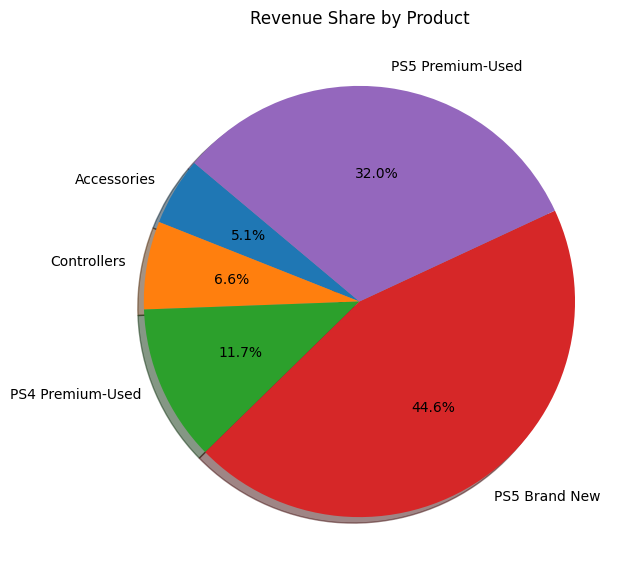

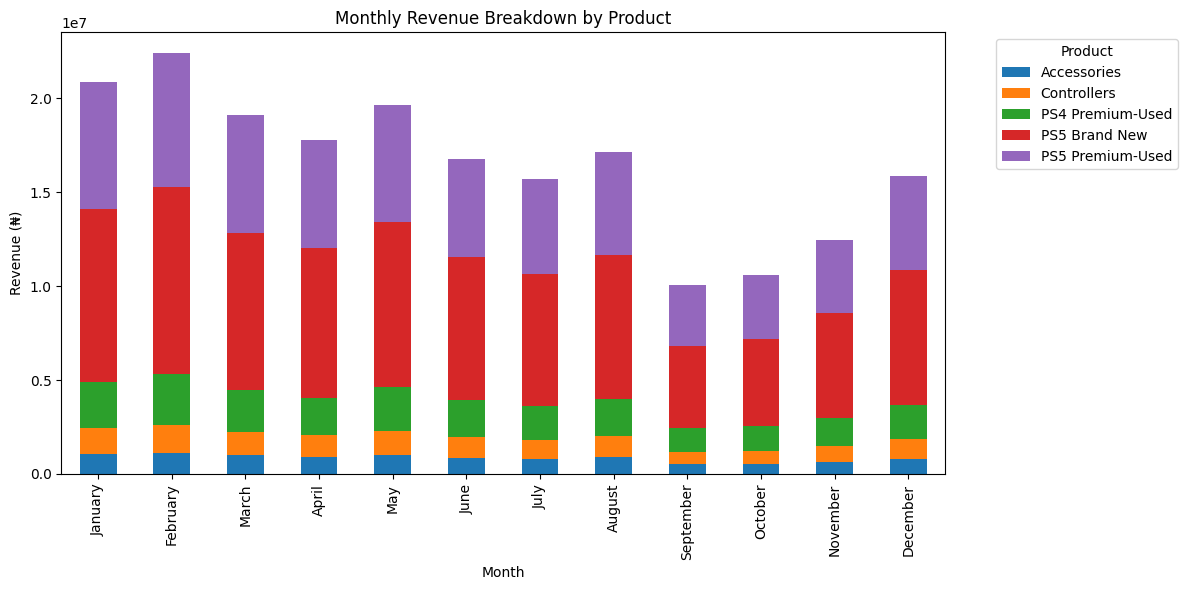

In [ ]:
monthly_product = df.pivot_table(index=["Month"], columns="Product", values="Revenue (₦)", aggfunc="sum")

# Reorder months
monthly_product = monthly_product.reindex(months_order)

monthly_product.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Monthly Revenue Breakdown by Product")
plt.xlabel("Month")
plt.ylabel("Revenue (₦)")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
